# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

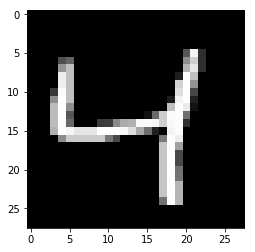

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [12]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 8

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [13]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [14]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6928
Epoch: 1/20... Training loss: 0.6919
Epoch: 1/20... Training loss: 0.6907
Epoch: 1/20... Training loss: 0.6893
Epoch: 1/20... Training loss: 0.6877
Epoch: 1/20... Training loss: 0.6854
Epoch: 1/20... Training loss: 0.6831
Epoch: 1/20... Training loss: 0.6806
Epoch: 1/20... Training loss: 0.6776
Epoch: 1/20... Training loss: 0.6740
Epoch: 1/20... Training loss: 0.6695
Epoch: 1/20... Training loss: 0.6649
Epoch: 1/20... Training loss: 0.6591
Epoch: 1/20... Training loss: 0.6535
Epoch: 1/20... Training loss: 0.6469
Epoch: 1/20... Training loss: 0.6407
Epoch: 1/20... Training loss: 0.6325
Epoch: 1/20... Training loss: 0.6251
Epoch: 1/20... Training loss: 0.6173
Epoch: 1/20... Training loss: 0.6083
Epoch: 1/20... Training loss: 0.6004
Epoch: 1/20... Training loss: 0.5909
Epoch: 1/20... Training loss: 0.5806
Epoch: 1/20... Training loss: 0.5680
Epoch: 1/20... Training loss: 0.5575
Epoch: 1/20... Training loss: 0.5476
Epoch: 1/20... Training loss: 0.5379
E

Epoch: 1/20... Training loss: 0.2593
Epoch: 1/20... Training loss: 0.2538
Epoch: 1/20... Training loss: 0.2602
Epoch: 1/20... Training loss: 0.2532
Epoch: 1/20... Training loss: 0.2568
Epoch: 1/20... Training loss: 0.2527
Epoch: 1/20... Training loss: 0.2526
Epoch: 1/20... Training loss: 0.2563
Epoch: 1/20... Training loss: 0.2546
Epoch: 1/20... Training loss: 0.2537
Epoch: 1/20... Training loss: 0.2532
Epoch: 1/20... Training loss: 0.2553
Epoch: 1/20... Training loss: 0.2500
Epoch: 1/20... Training loss: 0.2629
Epoch: 1/20... Training loss: 0.2565
Epoch: 1/20... Training loss: 0.2547
Epoch: 1/20... Training loss: 0.2548
Epoch: 1/20... Training loss: 0.2514
Epoch: 1/20... Training loss: 0.2617
Epoch: 1/20... Training loss: 0.2563
Epoch: 1/20... Training loss: 0.2552
Epoch: 1/20... Training loss: 0.2548
Epoch: 1/20... Training loss: 0.2488
Epoch: 1/20... Training loss: 0.2532
Epoch: 1/20... Training loss: 0.2549
Epoch: 1/20... Training loss: 0.2513
Epoch: 1/20... Training loss: 0.2489
E

Epoch: 2/20... Training loss: 0.2038
Epoch: 2/20... Training loss: 0.2095
Epoch: 2/20... Training loss: 0.2095
Epoch: 2/20... Training loss: 0.2130
Epoch: 2/20... Training loss: 0.2057
Epoch: 2/20... Training loss: 0.2028
Epoch: 2/20... Training loss: 0.2062
Epoch: 2/20... Training loss: 0.2054
Epoch: 2/20... Training loss: 0.2021
Epoch: 2/20... Training loss: 0.2110
Epoch: 2/20... Training loss: 0.2087
Epoch: 2/20... Training loss: 0.2042
Epoch: 2/20... Training loss: 0.2059
Epoch: 2/20... Training loss: 0.2091
Epoch: 2/20... Training loss: 0.2024
Epoch: 2/20... Training loss: 0.1997
Epoch: 2/20... Training loss: 0.2069
Epoch: 2/20... Training loss: 0.2049
Epoch: 2/20... Training loss: 0.2053
Epoch: 2/20... Training loss: 0.2034
Epoch: 2/20... Training loss: 0.2018
Epoch: 2/20... Training loss: 0.2038
Epoch: 2/20... Training loss: 0.2067
Epoch: 2/20... Training loss: 0.2029
Epoch: 2/20... Training loss: 0.2060
Epoch: 2/20... Training loss: 0.2022
Epoch: 2/20... Training loss: 0.2103
E

Epoch: 3/20... Training loss: 0.1981
Epoch: 3/20... Training loss: 0.1944
Epoch: 3/20... Training loss: 0.1874
Epoch: 3/20... Training loss: 0.1916
Epoch: 3/20... Training loss: 0.2027
Epoch: 3/20... Training loss: 0.1937
Epoch: 3/20... Training loss: 0.1971
Epoch: 3/20... Training loss: 0.1865
Epoch: 3/20... Training loss: 0.1986
Epoch: 3/20... Training loss: 0.1932
Epoch: 3/20... Training loss: 0.1894
Epoch: 3/20... Training loss: 0.1935
Epoch: 3/20... Training loss: 0.1889
Epoch: 3/20... Training loss: 0.1939
Epoch: 3/20... Training loss: 0.1880
Epoch: 3/20... Training loss: 0.1907
Epoch: 3/20... Training loss: 0.1931
Epoch: 3/20... Training loss: 0.1926
Epoch: 3/20... Training loss: 0.1931
Epoch: 3/20... Training loss: 0.1971
Epoch: 3/20... Training loss: 0.1950
Epoch: 3/20... Training loss: 0.1897
Epoch: 3/20... Training loss: 0.1931
Epoch: 3/20... Training loss: 0.1956
Epoch: 3/20... Training loss: 0.1953
Epoch: 3/20... Training loss: 0.1877
Epoch: 3/20... Training loss: 0.1888
E

Epoch: 4/20... Training loss: 0.1839
Epoch: 4/20... Training loss: 0.1870
Epoch: 4/20... Training loss: 0.1897
Epoch: 4/20... Training loss: 0.1855
Epoch: 4/20... Training loss: 0.1832
Epoch: 4/20... Training loss: 0.1858
Epoch: 4/20... Training loss: 0.1823
Epoch: 4/20... Training loss: 0.1871
Epoch: 4/20... Training loss: 0.1855
Epoch: 4/20... Training loss: 0.1909
Epoch: 4/20... Training loss: 0.1911
Epoch: 4/20... Training loss: 0.1858
Epoch: 4/20... Training loss: 0.1947
Epoch: 4/20... Training loss: 0.1869
Epoch: 4/20... Training loss: 0.1875
Epoch: 4/20... Training loss: 0.1944
Epoch: 4/20... Training loss: 0.1856
Epoch: 4/20... Training loss: 0.1880
Epoch: 4/20... Training loss: 0.1844
Epoch: 4/20... Training loss: 0.1840
Epoch: 4/20... Training loss: 0.1834
Epoch: 4/20... Training loss: 0.1897
Epoch: 4/20... Training loss: 0.1902
Epoch: 4/20... Training loss: 0.1847
Epoch: 4/20... Training loss: 0.1829
Epoch: 4/20... Training loss: 0.1838
Epoch: 4/20... Training loss: 0.1839
E

Epoch: 4/20... Training loss: 0.1875
Epoch: 4/20... Training loss: 0.1771
Epoch: 4/20... Training loss: 0.1886
Epoch: 4/20... Training loss: 0.1823
Epoch: 4/20... Training loss: 0.1855
Epoch: 4/20... Training loss: 0.1833
Epoch: 4/20... Training loss: 0.1789
Epoch: 4/20... Training loss: 0.1795
Epoch: 4/20... Training loss: 0.1852
Epoch: 4/20... Training loss: 0.1801
Epoch: 4/20... Training loss: 0.1765
Epoch: 4/20... Training loss: 0.1786
Epoch: 4/20... Training loss: 0.1813
Epoch: 4/20... Training loss: 0.1830
Epoch: 4/20... Training loss: 0.1870
Epoch: 4/20... Training loss: 0.1820
Epoch: 4/20... Training loss: 0.1821
Epoch: 4/20... Training loss: 0.1832
Epoch: 4/20... Training loss: 0.1805
Epoch: 4/20... Training loss: 0.1787
Epoch: 4/20... Training loss: 0.1813
Epoch: 4/20... Training loss: 0.1878
Epoch: 4/20... Training loss: 0.1792
Epoch: 4/20... Training loss: 0.1797
Epoch: 4/20... Training loss: 0.1832
Epoch: 4/20... Training loss: 0.1793
Epoch: 4/20... Training loss: 0.1795
E

Epoch: 5/20... Training loss: 0.1818
Epoch: 5/20... Training loss: 0.1810
Epoch: 5/20... Training loss: 0.1737
Epoch: 5/20... Training loss: 0.1792
Epoch: 5/20... Training loss: 0.1884
Epoch: 5/20... Training loss: 0.1798
Epoch: 5/20... Training loss: 0.1874
Epoch: 5/20... Training loss: 0.1828
Epoch: 5/20... Training loss: 0.1784
Epoch: 5/20... Training loss: 0.1767
Epoch: 5/20... Training loss: 0.1780
Epoch: 5/20... Training loss: 0.1836
Epoch: 5/20... Training loss: 0.1835
Epoch: 5/20... Training loss: 0.1828
Epoch: 5/20... Training loss: 0.1773
Epoch: 5/20... Training loss: 0.1812
Epoch: 5/20... Training loss: 0.1782
Epoch: 5/20... Training loss: 0.1798
Epoch: 5/20... Training loss: 0.1772
Epoch: 5/20... Training loss: 0.1808
Epoch: 5/20... Training loss: 0.1714
Epoch: 5/20... Training loss: 0.1786
Epoch: 5/20... Training loss: 0.1880
Epoch: 5/20... Training loss: 0.1828
Epoch: 5/20... Training loss: 0.1747
Epoch: 5/20... Training loss: 0.1789
Epoch: 5/20... Training loss: 0.1804
E

Epoch: 6/20... Training loss: 0.1747
Epoch: 6/20... Training loss: 0.1769
Epoch: 6/20... Training loss: 0.1787
Epoch: 6/20... Training loss: 0.1768
Epoch: 6/20... Training loss: 0.1784
Epoch: 6/20... Training loss: 0.1816
Epoch: 6/20... Training loss: 0.1794
Epoch: 6/20... Training loss: 0.1798
Epoch: 6/20... Training loss: 0.1812
Epoch: 6/20... Training loss: 0.1744
Epoch: 6/20... Training loss: 0.1777
Epoch: 6/20... Training loss: 0.1755
Epoch: 6/20... Training loss: 0.1796
Epoch: 6/20... Training loss: 0.1800
Epoch: 6/20... Training loss: 0.1733
Epoch: 6/20... Training loss: 0.1757
Epoch: 6/20... Training loss: 0.1735
Epoch: 6/20... Training loss: 0.1710
Epoch: 6/20... Training loss: 0.1694
Epoch: 6/20... Training loss: 0.1877
Epoch: 6/20... Training loss: 0.1787
Epoch: 6/20... Training loss: 0.1811
Epoch: 6/20... Training loss: 0.1805
Epoch: 6/20... Training loss: 0.1807
Epoch: 6/20... Training loss: 0.1774
Epoch: 6/20... Training loss: 0.1806
Epoch: 6/20... Training loss: 0.1754
E

Epoch: 7/20... Training loss: 0.1734
Epoch: 7/20... Training loss: 0.1747
Epoch: 7/20... Training loss: 0.1753
Epoch: 7/20... Training loss: 0.1782
Epoch: 7/20... Training loss: 0.1753
Epoch: 7/20... Training loss: 0.1708
Epoch: 7/20... Training loss: 0.1774
Epoch: 7/20... Training loss: 0.1743
Epoch: 7/20... Training loss: 0.1776
Epoch: 7/20... Training loss: 0.1711
Epoch: 7/20... Training loss: 0.1783
Epoch: 7/20... Training loss: 0.1792
Epoch: 7/20... Training loss: 0.1825
Epoch: 7/20... Training loss: 0.1819
Epoch: 7/20... Training loss: 0.1796
Epoch: 7/20... Training loss: 0.1773
Epoch: 7/20... Training loss: 0.1716
Epoch: 7/20... Training loss: 0.1817
Epoch: 7/20... Training loss: 0.1769
Epoch: 7/20... Training loss: 0.1782
Epoch: 7/20... Training loss: 0.1718
Epoch: 7/20... Training loss: 0.1754
Epoch: 7/20... Training loss: 0.1773
Epoch: 7/20... Training loss: 0.1715
Epoch: 7/20... Training loss: 0.1733
Epoch: 7/20... Training loss: 0.1795
Epoch: 7/20... Training loss: 0.1756
E

Epoch: 8/20... Training loss: 0.1757
Epoch: 8/20... Training loss: 0.1696
Epoch: 8/20... Training loss: 0.1752
Epoch: 8/20... Training loss: 0.1754
Epoch: 8/20... Training loss: 0.1734
Epoch: 8/20... Training loss: 0.1787
Epoch: 8/20... Training loss: 0.1742
Epoch: 8/20... Training loss: 0.1732
Epoch: 8/20... Training loss: 0.1793
Epoch: 8/20... Training loss: 0.1734
Epoch: 8/20... Training loss: 0.1718
Epoch: 8/20... Training loss: 0.1707
Epoch: 8/20... Training loss: 0.1718
Epoch: 8/20... Training loss: 0.1695
Epoch: 8/20... Training loss: 0.1749
Epoch: 8/20... Training loss: 0.1749
Epoch: 8/20... Training loss: 0.1736
Epoch: 8/20... Training loss: 0.1776
Epoch: 8/20... Training loss: 0.1726
Epoch: 8/20... Training loss: 0.1748
Epoch: 8/20... Training loss: 0.1767
Epoch: 8/20... Training loss: 0.1738
Epoch: 8/20... Training loss: 0.1647
Epoch: 8/20... Training loss: 0.1717
Epoch: 8/20... Training loss: 0.1733
Epoch: 8/20... Training loss: 0.1759
Epoch: 8/20... Training loss: 0.1711
E

Epoch: 8/20... Training loss: 0.1746
Epoch: 8/20... Training loss: 0.1715
Epoch: 8/20... Training loss: 0.1738
Epoch: 8/20... Training loss: 0.1711
Epoch: 8/20... Training loss: 0.1715
Epoch: 8/20... Training loss: 0.1780
Epoch: 8/20... Training loss: 0.1695
Epoch: 8/20... Training loss: 0.1793
Epoch: 8/20... Training loss: 0.1747
Epoch: 8/20... Training loss: 0.1705
Epoch: 8/20... Training loss: 0.1759
Epoch: 8/20... Training loss: 0.1825
Epoch: 8/20... Training loss: 0.1727
Epoch: 8/20... Training loss: 0.1769
Epoch: 8/20... Training loss: 0.1722
Epoch: 8/20... Training loss: 0.1752
Epoch: 8/20... Training loss: 0.1739
Epoch: 8/20... Training loss: 0.1720
Epoch: 8/20... Training loss: 0.1697
Epoch: 8/20... Training loss: 0.1744
Epoch: 8/20... Training loss: 0.1810
Epoch: 8/20... Training loss: 0.1735
Epoch: 8/20... Training loss: 0.1726
Epoch: 8/20... Training loss: 0.1756
Epoch: 8/20... Training loss: 0.1739
Epoch: 8/20... Training loss: 0.1783
Epoch: 8/20... Training loss: 0.1716
E

Epoch: 9/20... Training loss: 0.1719
Epoch: 9/20... Training loss: 0.1724
Epoch: 9/20... Training loss: 0.1764
Epoch: 9/20... Training loss: 0.1673
Epoch: 9/20... Training loss: 0.1750
Epoch: 9/20... Training loss: 0.1770
Epoch: 9/20... Training loss: 0.1742
Epoch: 9/20... Training loss: 0.1772
Epoch: 9/20... Training loss: 0.1725
Epoch: 9/20... Training loss: 0.1744
Epoch: 9/20... Training loss: 0.1726
Epoch: 9/20... Training loss: 0.1634
Epoch: 9/20... Training loss: 0.1683
Epoch: 9/20... Training loss: 0.1692
Epoch: 9/20... Training loss: 0.1741
Epoch: 9/20... Training loss: 0.1618
Epoch: 9/20... Training loss: 0.1733
Epoch: 9/20... Training loss: 0.1693
Epoch: 9/20... Training loss: 0.1748
Epoch: 9/20... Training loss: 0.1746
Epoch: 9/20... Training loss: 0.1750
Epoch: 9/20... Training loss: 0.1718
Epoch: 9/20... Training loss: 0.1733
Epoch: 9/20... Training loss: 0.1768
Epoch: 9/20... Training loss: 0.1727
Epoch: 9/20... Training loss: 0.1734
Epoch: 9/20... Training loss: 0.1724
E

Epoch: 10/20... Training loss: 0.1688
Epoch: 10/20... Training loss: 0.1766
Epoch: 10/20... Training loss: 0.1676
Epoch: 10/20... Training loss: 0.1646
Epoch: 10/20... Training loss: 0.1727
Epoch: 10/20... Training loss: 0.1744
Epoch: 10/20... Training loss: 0.1657
Epoch: 10/20... Training loss: 0.1720
Epoch: 10/20... Training loss: 0.1711
Epoch: 10/20... Training loss: 0.1706
Epoch: 10/20... Training loss: 0.1696
Epoch: 10/20... Training loss: 0.1731
Epoch: 10/20... Training loss: 0.1734
Epoch: 10/20... Training loss: 0.1768
Epoch: 10/20... Training loss: 0.1724
Epoch: 10/20... Training loss: 0.1665
Epoch: 10/20... Training loss: 0.1677
Epoch: 10/20... Training loss: 0.1659
Epoch: 10/20... Training loss: 0.1704
Epoch: 10/20... Training loss: 0.1664
Epoch: 10/20... Training loss: 0.1697
Epoch: 10/20... Training loss: 0.1689
Epoch: 10/20... Training loss: 0.1759
Epoch: 10/20... Training loss: 0.1690
Epoch: 10/20... Training loss: 0.1711
Epoch: 10/20... Training loss: 0.1743
Epoch: 10/20

Epoch: 11/20... Training loss: 0.1695
Epoch: 11/20... Training loss: 0.1742
Epoch: 11/20... Training loss: 0.1672
Epoch: 11/20... Training loss: 0.1711
Epoch: 11/20... Training loss: 0.1727
Epoch: 11/20... Training loss: 0.1724
Epoch: 11/20... Training loss: 0.1726
Epoch: 11/20... Training loss: 0.1690
Epoch: 11/20... Training loss: 0.1694
Epoch: 11/20... Training loss: 0.1769
Epoch: 11/20... Training loss: 0.1778
Epoch: 11/20... Training loss: 0.1773
Epoch: 11/20... Training loss: 0.1681
Epoch: 11/20... Training loss: 0.1729
Epoch: 11/20... Training loss: 0.1707
Epoch: 11/20... Training loss: 0.1753
Epoch: 11/20... Training loss: 0.1627
Epoch: 11/20... Training loss: 0.1712
Epoch: 11/20... Training loss: 0.1741
Epoch: 11/20... Training loss: 0.1722
Epoch: 11/20... Training loss: 0.1771
Epoch: 11/20... Training loss: 0.1752
Epoch: 11/20... Training loss: 0.1726
Epoch: 11/20... Training loss: 0.1754
Epoch: 11/20... Training loss: 0.1706
Epoch: 11/20... Training loss: 0.1650
Epoch: 11/20

Epoch: 11/20... Training loss: 0.1736
Epoch: 11/20... Training loss: 0.1698
Epoch: 11/20... Training loss: 0.1726
Epoch: 11/20... Training loss: 0.1667
Epoch: 11/20... Training loss: 0.1719
Epoch: 11/20... Training loss: 0.1661
Epoch: 11/20... Training loss: 0.1698
Epoch: 11/20... Training loss: 0.1715
Epoch: 11/20... Training loss: 0.1644
Epoch: 11/20... Training loss: 0.1741
Epoch: 11/20... Training loss: 0.1734
Epoch: 11/20... Training loss: 0.1712
Epoch: 11/20... Training loss: 0.1692
Epoch: 11/20... Training loss: 0.1759
Epoch: 11/20... Training loss: 0.1703
Epoch: 11/20... Training loss: 0.1668
Epoch: 11/20... Training loss: 0.1723
Epoch: 11/20... Training loss: 0.1719
Epoch: 11/20... Training loss: 0.1703
Epoch: 11/20... Training loss: 0.1709
Epoch: 11/20... Training loss: 0.1773
Epoch: 11/20... Training loss: 0.1752
Epoch: 11/20... Training loss: 0.1713
Epoch: 11/20... Training loss: 0.1695
Epoch: 11/20... Training loss: 0.1756
Epoch: 11/20... Training loss: 0.1684
Epoch: 11/20

Epoch: 12/20... Training loss: 0.1778
Epoch: 12/20... Training loss: 0.1651
Epoch: 12/20... Training loss: 0.1662
Epoch: 12/20... Training loss: 0.1700
Epoch: 12/20... Training loss: 0.1686
Epoch: 12/20... Training loss: 0.1729
Epoch: 12/20... Training loss: 0.1690
Epoch: 12/20... Training loss: 0.1662
Epoch: 12/20... Training loss: 0.1726
Epoch: 12/20... Training loss: 0.1671
Epoch: 12/20... Training loss: 0.1713
Epoch: 12/20... Training loss: 0.1673
Epoch: 12/20... Training loss: 0.1741
Epoch: 12/20... Training loss: 0.1687
Epoch: 12/20... Training loss: 0.1740
Epoch: 12/20... Training loss: 0.1742
Epoch: 12/20... Training loss: 0.1725
Epoch: 12/20... Training loss: 0.1715
Epoch: 12/20... Training loss: 0.1685
Epoch: 12/20... Training loss: 0.1732
Epoch: 12/20... Training loss: 0.1707
Epoch: 12/20... Training loss: 0.1685
Epoch: 12/20... Training loss: 0.1655
Epoch: 12/20... Training loss: 0.1699
Epoch: 12/20... Training loss: 0.1715
Epoch: 12/20... Training loss: 0.1736
Epoch: 12/20

Epoch: 13/20... Training loss: 0.1650
Epoch: 13/20... Training loss: 0.1737
Epoch: 13/20... Training loss: 0.1690
Epoch: 13/20... Training loss: 0.1735
Epoch: 13/20... Training loss: 0.1670
Epoch: 13/20... Training loss: 0.1672
Epoch: 13/20... Training loss: 0.1717
Epoch: 13/20... Training loss: 0.1748
Epoch: 13/20... Training loss: 0.1672
Epoch: 13/20... Training loss: 0.1698
Epoch: 13/20... Training loss: 0.1760
Epoch: 13/20... Training loss: 0.1707
Epoch: 13/20... Training loss: 0.1621
Epoch: 13/20... Training loss: 0.1699
Epoch: 13/20... Training loss: 0.1704
Epoch: 13/20... Training loss: 0.1716
Epoch: 13/20... Training loss: 0.1707
Epoch: 13/20... Training loss: 0.1673
Epoch: 13/20... Training loss: 0.1680
Epoch: 13/20... Training loss: 0.1707
Epoch: 13/20... Training loss: 0.1653
Epoch: 13/20... Training loss: 0.1661
Epoch: 13/20... Training loss: 0.1715
Epoch: 13/20... Training loss: 0.1704
Epoch: 13/20... Training loss: 0.1744
Epoch: 13/20... Training loss: 0.1700
Epoch: 13/20

Epoch: 14/20... Training loss: 0.1673
Epoch: 14/20... Training loss: 0.1693
Epoch: 14/20... Training loss: 0.1735
Epoch: 14/20... Training loss: 0.1723
Epoch: 14/20... Training loss: 0.1716
Epoch: 14/20... Training loss: 0.1752
Epoch: 14/20... Training loss: 0.1742
Epoch: 14/20... Training loss: 0.1721
Epoch: 14/20... Training loss: 0.1725
Epoch: 14/20... Training loss: 0.1760
Epoch: 14/20... Training loss: 0.1735
Epoch: 14/20... Training loss: 0.1646
Epoch: 14/20... Training loss: 0.1701
Epoch: 14/20... Training loss: 0.1689
Epoch: 14/20... Training loss: 0.1688
Epoch: 14/20... Training loss: 0.1647
Epoch: 14/20... Training loss: 0.1699
Epoch: 14/20... Training loss: 0.1631
Epoch: 14/20... Training loss: 0.1654
Epoch: 14/20... Training loss: 0.1695
Epoch: 14/20... Training loss: 0.1749
Epoch: 14/20... Training loss: 0.1702
Epoch: 14/20... Training loss: 0.1661
Epoch: 14/20... Training loss: 0.1715
Epoch: 14/20... Training loss: 0.1711
Epoch: 14/20... Training loss: 0.1690
Epoch: 14/20

Epoch: 14/20... Training loss: 0.1742
Epoch: 14/20... Training loss: 0.1754
Epoch: 14/20... Training loss: 0.1693
Epoch: 14/20... Training loss: 0.1659
Epoch: 14/20... Training loss: 0.1720
Epoch: 14/20... Training loss: 0.1704
Epoch: 14/20... Training loss: 0.1674
Epoch: 14/20... Training loss: 0.1697
Epoch: 14/20... Training loss: 0.1663
Epoch: 14/20... Training loss: 0.1700
Epoch: 14/20... Training loss: 0.1670
Epoch: 14/20... Training loss: 0.1650
Epoch: 14/20... Training loss: 0.1720
Epoch: 14/20... Training loss: 0.1650
Epoch: 14/20... Training loss: 0.1679
Epoch: 14/20... Training loss: 0.1699
Epoch: 14/20... Training loss: 0.1753
Epoch: 14/20... Training loss: 0.1719
Epoch: 14/20... Training loss: 0.1598
Epoch: 14/20... Training loss: 0.1793
Epoch: 14/20... Training loss: 0.1674
Epoch: 14/20... Training loss: 0.1643
Epoch: 14/20... Training loss: 0.1688
Epoch: 14/20... Training loss: 0.1701
Epoch: 14/20... Training loss: 0.1657
Epoch: 14/20... Training loss: 0.1695
Epoch: 14/20

Epoch: 15/20... Training loss: 0.1667
Epoch: 15/20... Training loss: 0.1624
Epoch: 15/20... Training loss: 0.1688
Epoch: 15/20... Training loss: 0.1743
Epoch: 15/20... Training loss: 0.1660
Epoch: 15/20... Training loss: 0.1634
Epoch: 15/20... Training loss: 0.1644
Epoch: 15/20... Training loss: 0.1707
Epoch: 15/20... Training loss: 0.1687
Epoch: 15/20... Training loss: 0.1706
Epoch: 15/20... Training loss: 0.1692
Epoch: 15/20... Training loss: 0.1689
Epoch: 15/20... Training loss: 0.1757
Epoch: 15/20... Training loss: 0.1643
Epoch: 15/20... Training loss: 0.1657
Epoch: 15/20... Training loss: 0.1700
Epoch: 15/20... Training loss: 0.1659
Epoch: 15/20... Training loss: 0.1670
Epoch: 15/20... Training loss: 0.1639
Epoch: 15/20... Training loss: 0.1677
Epoch: 15/20... Training loss: 0.1672
Epoch: 15/20... Training loss: 0.1714
Epoch: 15/20... Training loss: 0.1715
Epoch: 15/20... Training loss: 0.1672
Epoch: 15/20... Training loss: 0.1708
Epoch: 15/20... Training loss: 0.1678
Epoch: 15/20

Epoch: 16/20... Training loss: 0.1745
Epoch: 16/20... Training loss: 0.1711
Epoch: 16/20... Training loss: 0.1639
Epoch: 16/20... Training loss: 0.1743
Epoch: 16/20... Training loss: 0.1622
Epoch: 16/20... Training loss: 0.1651
Epoch: 16/20... Training loss: 0.1656
Epoch: 16/20... Training loss: 0.1670
Epoch: 16/20... Training loss: 0.1645
Epoch: 16/20... Training loss: 0.1705
Epoch: 16/20... Training loss: 0.1670
Epoch: 16/20... Training loss: 0.1670
Epoch: 16/20... Training loss: 0.1700
Epoch: 16/20... Training loss: 0.1638
Epoch: 16/20... Training loss: 0.1666
Epoch: 16/20... Training loss: 0.1629
Epoch: 16/20... Training loss: 0.1645
Epoch: 16/20... Training loss: 0.1647
Epoch: 16/20... Training loss: 0.1659
Epoch: 16/20... Training loss: 0.1731
Epoch: 16/20... Training loss: 0.1706
Epoch: 16/20... Training loss: 0.1658
Epoch: 16/20... Training loss: 0.1710
Epoch: 16/20... Training loss: 0.1668
Epoch: 16/20... Training loss: 0.1693
Epoch: 16/20... Training loss: 0.1687
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1614
Epoch: 17/20... Training loss: 0.1689
Epoch: 17/20... Training loss: 0.1679
Epoch: 17/20... Training loss: 0.1609
Epoch: 17/20... Training loss: 0.1643
Epoch: 17/20... Training loss: 0.1681
Epoch: 17/20... Training loss: 0.1592
Epoch: 17/20... Training loss: 0.1625
Epoch: 17/20... Training loss: 0.1604
Epoch: 17/20... Training loss: 0.1692
Epoch: 17/20... Training loss: 0.1719
Epoch: 17/20... Training loss: 0.1694
Epoch: 17/20... Training loss: 0.1675
Epoch: 17/20... Training loss: 0.1699
Epoch: 17/20... Training loss: 0.1677
Epoch: 17/20... Training loss: 0.1660
Epoch: 17/20... Training loss: 0.1708
Epoch: 17/20... Training loss: 0.1664
Epoch: 17/20... Training loss: 0.1679
Epoch: 17/20... Training loss: 0.1703
Epoch: 17/20... Training loss: 0.1670
Epoch: 17/20... Training loss: 0.1663
Epoch: 17/20... Training loss: 0.1682
Epoch: 17/20... Training loss: 0.1684
Epoch: 17/20... Training loss: 0.1671
Epoch: 17/20... Training loss: 0.1633
Epoch: 17/20

Epoch: 17/20... Training loss: 0.1602
Epoch: 17/20... Training loss: 0.1661
Epoch: 17/20... Training loss: 0.1640
Epoch: 17/20... Training loss: 0.1681
Epoch: 17/20... Training loss: 0.1619
Epoch: 17/20... Training loss: 0.1661
Epoch: 17/20... Training loss: 0.1656
Epoch: 17/20... Training loss: 0.1687
Epoch: 17/20... Training loss: 0.1738
Epoch: 17/20... Training loss: 0.1680
Epoch: 17/20... Training loss: 0.1632
Epoch: 17/20... Training loss: 0.1685
Epoch: 17/20... Training loss: 0.1658
Epoch: 17/20... Training loss: 0.1707
Epoch: 17/20... Training loss: 0.1671
Epoch: 17/20... Training loss: 0.1733
Epoch: 17/20... Training loss: 0.1665
Epoch: 17/20... Training loss: 0.1705
Epoch: 17/20... Training loss: 0.1674
Epoch: 17/20... Training loss: 0.1623
Epoch: 17/20... Training loss: 0.1651
Epoch: 17/20... Training loss: 0.1670
Epoch: 17/20... Training loss: 0.1739
Epoch: 17/20... Training loss: 0.1636
Epoch: 17/20... Training loss: 0.1681
Epoch: 18/20... Training loss: 0.1662
Epoch: 18/20

Epoch: 18/20... Training loss: 0.1640
Epoch: 18/20... Training loss: 0.1708
Epoch: 18/20... Training loss: 0.1616
Epoch: 18/20... Training loss: 0.1641
Epoch: 18/20... Training loss: 0.1684
Epoch: 18/20... Training loss: 0.1666
Epoch: 18/20... Training loss: 0.1671
Epoch: 18/20... Training loss: 0.1641
Epoch: 18/20... Training loss: 0.1628
Epoch: 18/20... Training loss: 0.1692
Epoch: 18/20... Training loss: 0.1678
Epoch: 18/20... Training loss: 0.1695
Epoch: 18/20... Training loss: 0.1614
Epoch: 18/20... Training loss: 0.1682
Epoch: 18/20... Training loss: 0.1618
Epoch: 18/20... Training loss: 0.1703
Epoch: 18/20... Training loss: 0.1673
Epoch: 18/20... Training loss: 0.1676
Epoch: 18/20... Training loss: 0.1684
Epoch: 18/20... Training loss: 0.1714
Epoch: 18/20... Training loss: 0.1702
Epoch: 18/20... Training loss: 0.1701
Epoch: 18/20... Training loss: 0.1753
Epoch: 18/20... Training loss: 0.1733
Epoch: 18/20... Training loss: 0.1699
Epoch: 18/20... Training loss: 0.1647
Epoch: 18/20

Epoch: 19/20... Training loss: 0.1672
Epoch: 19/20... Training loss: 0.1642
Epoch: 19/20... Training loss: 0.1644
Epoch: 19/20... Training loss: 0.1659
Epoch: 19/20... Training loss: 0.1663
Epoch: 19/20... Training loss: 0.1737
Epoch: 19/20... Training loss: 0.1684
Epoch: 19/20... Training loss: 0.1679
Epoch: 19/20... Training loss: 0.1598
Epoch: 19/20... Training loss: 0.1676
Epoch: 19/20... Training loss: 0.1681
Epoch: 19/20... Training loss: 0.1670
Epoch: 19/20... Training loss: 0.1661
Epoch: 19/20... Training loss: 0.1671
Epoch: 19/20... Training loss: 0.1596
Epoch: 19/20... Training loss: 0.1641
Epoch: 19/20... Training loss: 0.1644
Epoch: 19/20... Training loss: 0.1675
Epoch: 19/20... Training loss: 0.1598
Epoch: 19/20... Training loss: 0.1632
Epoch: 19/20... Training loss: 0.1704
Epoch: 19/20... Training loss: 0.1686
Epoch: 19/20... Training loss: 0.1654
Epoch: 19/20... Training loss: 0.1629
Epoch: 19/20... Training loss: 0.1696
Epoch: 19/20... Training loss: 0.1677
Epoch: 19/20

Epoch: 20/20... Training loss: 0.1701
Epoch: 20/20... Training loss: 0.1672
Epoch: 20/20... Training loss: 0.1655
Epoch: 20/20... Training loss: 0.1727
Epoch: 20/20... Training loss: 0.1695
Epoch: 20/20... Training loss: 0.1671
Epoch: 20/20... Training loss: 0.1721
Epoch: 20/20... Training loss: 0.1680
Epoch: 20/20... Training loss: 0.1673
Epoch: 20/20... Training loss: 0.1670
Epoch: 20/20... Training loss: 0.1648
Epoch: 20/20... Training loss: 0.1652
Epoch: 20/20... Training loss: 0.1662
Epoch: 20/20... Training loss: 0.1659
Epoch: 20/20... Training loss: 0.1670
Epoch: 20/20... Training loss: 0.1721
Epoch: 20/20... Training loss: 0.1677
Epoch: 20/20... Training loss: 0.1670
Epoch: 20/20... Training loss: 0.1714
Epoch: 20/20... Training loss: 0.1661
Epoch: 20/20... Training loss: 0.1619
Epoch: 20/20... Training loss: 0.1635
Epoch: 20/20... Training loss: 0.1679
Epoch: 20/20... Training loss: 0.1685
Epoch: 20/20... Training loss: 0.1689
Epoch: 20/20... Training loss: 0.1662
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

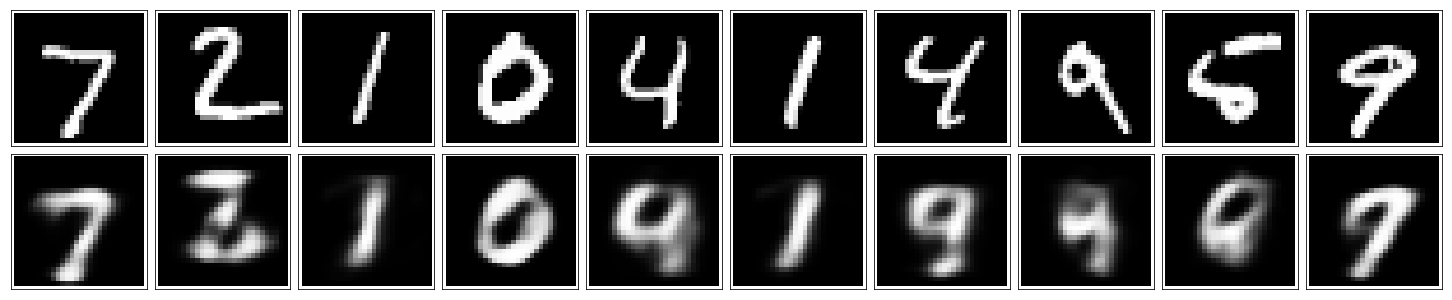

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [18]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.